In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

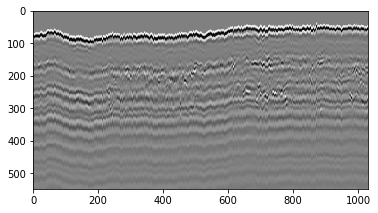

In [2]:
#Load input image and convert to grayscale
image = cv2.imread('GPR_1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap ='gray')

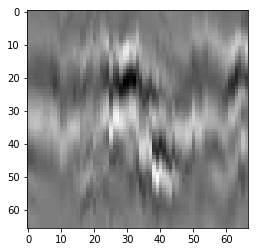

In [3]:
#Load template image
template = cv2.imread('template_1.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
plt.imshow(template, cmap = 'gray')

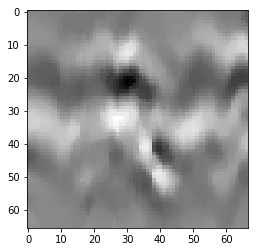

In [4]:
template = cv2.medianBlur(template,5)
plt.imshow(template, cmap = 'gray')

In [5]:
#Load method
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

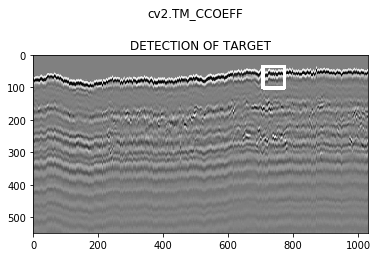

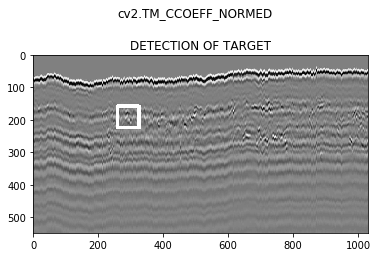

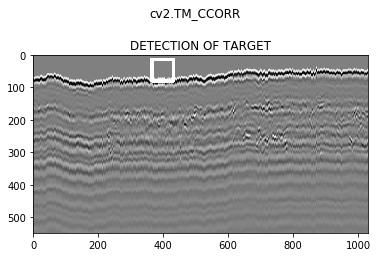

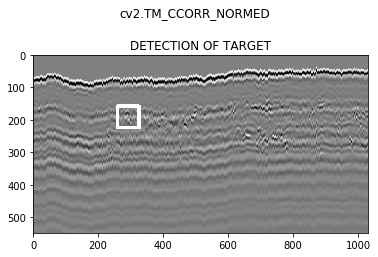

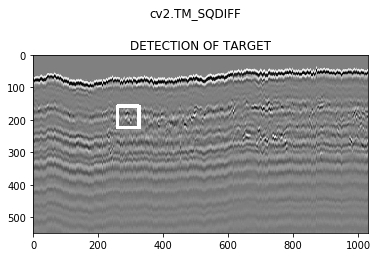

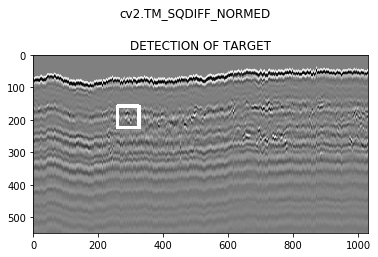

In [11]:
#Template matching
for m in methods:
    
    # CREATE A COPY 
    image_copy = image.copy()
    
    method = eval(m)
    
    # TEMPLATE MATCHING
    res = cv2.matchTemplate(image_copy,template,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else: 
        top_left = max_loc
        
    height,width = template.shape
    
    #height,width,channels = template.shape
    
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(image_copy,top_left,bottom_right,(255,0,0),10)
    
    # PLOT AND SHOW THE IMAGES

    plt.imshow(image_copy, cmap = 'gray')
    
    
    # TEMPLATE WITH THE METHOD USED 
    
    
    plt.show()
    
    print('\n')
    print('\n')